In [1]:
import argparse
from dataset import *
from models import * 
from generation import *
import numpy as np

from torch.utils.data import DataLoader
from torch import optim
import torch.nn.functional as F
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
DIR_PATH = "dataset/poems.csv"
SOV_TOKEN = "<SOV>" # start of verse
EOV_TOKEN = "<EOV>" # end of verse

parser = argparse.ArgumentParser()
parser.add_argument('--max_epochs', type=int, default=10)
parser.add_argument('--batch_size', type=int, default=128)
parser.add_argument('--sequence_length', type=int, default=10)
args, unknown = parser.parse_known_args()

# Define the dataset and dataloader
dataset = SpanishPoemsDataset(DIR_PATH, SOV_TOKEN, EOV_TOKEN, args)
dataloader = DataLoader(dataset, batch_size=args.batch_size, shuffle=False)

print(dataset.__getitem__(3))
print('Vocab:', len(dataset.unique_words))

(tensor([2449, 1375,    1,    0,    6,   15, 2450, 2451,    5,   66]), tensor([1375,    1,    0,    6,   15, 2450, 2451,    5,   66, 2452]))
Vocab: 7506


In [3]:
# Set hyperparameters

input_size = len(dataset.unique_words) # size of the vocabulary for the input sequence
output_size = len(dataset.unique_words) # size of the vocabulary for the target sequence
num_layers = 1
batch_size = args.batch_size
sequence_length = args.sequence_length
num_epochs = args.max_epochs
learning_rate = 0.001
save_epochs = 2

# Define the loss function 
criterion = nn.CrossEntropyLoss()



# GENERATION 

## MODEL 1: Baseline (128 cells)

In [4]:
hidden_size = 128

In [5]:
# Instantiate the encoder and decoder, and optimizer
LSTM_encoder = LSTMEncoder(input_size, hidden_size, num_layers)
GRU_decoder = GRUDecoder(hidden_size, output_size, num_layers)
optimizer_1 = optim.Adam(list(LSTM_encoder.parameters()) + list(GRU_decoder.parameters()), lr=learning_rate)

In [6]:
encoder_1_ckpt = "saved_models/encoder_2.pt"
decoder_1_ckpt = "saved_models/decoder_2.pt"

In [7]:
perplexity_1 = []
for _ in range(50): 
    _, perplexity = generate_poem_GRU(
    LSTM_encoder, GRU_decoder, dataset, 
    0, 1, max_length=50, temperature=0.8, top_k=10, 
    encoder_type='LSTM', 
    encoder_ckpt=encoder_1_ckpt, 
    decoder_ckpt=decoder_1_ckpt
)
    perplexity_1.append(perplexity)


## MODEL 2: 64 cells

In [8]:
hidden_size = 64

In [9]:
GRU_decoder = GRUDecoder(hidden_size, output_size, num_layers)
LSTM_encoder = LSTMEncoder(input_size, hidden_size, num_layers)
optimizer_2 = optim.Adam(list(LSTM_encoder.parameters()) + list(GRU_decoder.parameters()), lr=learning_rate)

In [10]:
encoder_2_ckpt = "saved_models/encoder_4.pt"
decoder_2_ckpt = "saved_models/decoder_4.pt"

In [11]:
perplexity_2 = []
for _ in range(50): 
    _, perplexity = generate_poem_GRU(
    LSTM_encoder, GRU_decoder, dataset, 
    0, 1, max_length=40, temperature=0.8, top_k=10, 
    encoder_type='LSTM', 
    encoder_ckpt=encoder_2_ckpt, 
    decoder_ckpt=decoder_2_ckpt
)
    perplexity_2.append(perplexity)

## MODEL 3: 32 cells

In [12]:
hidden_size = 32

In [13]:
GRU_decoder = GRUDecoder(hidden_size, output_size, num_layers)
LSTM_encoder = LSTMEncoder(input_size, hidden_size, num_layers)
optimizer_3 = optim.Adam(list(LSTM_encoder.parameters()) + list(GRU_decoder.parameters()), lr=learning_rate)

In [14]:
encoder_3_ckpt = "saved_models/encoder_6.pt"
decoder_3_ckpt = "saved_models/decoder_6.pt"

In [15]:
perplexity_3 = []
for _ in range(50): 
    _, perplexity = generate_poem_GRU(
    LSTM_encoder, GRU_decoder, dataset, 
    0, 1, max_length=40, temperature=0.8, top_k=10, 
    encoder_type='LSTM',
    encoder_ckpt=encoder_3_ckpt, 
    decoder_ckpt=decoder_3_ckpt
)
    perplexity_3.append(perplexity)

## MODEL 4: 96 cells

In [16]:
hidden_size = 96

In [17]:
GRU_decoder = GRUDecoder(hidden_size, output_size, num_layers)
LSTM_encoder = LSTMEncoder(input_size, hidden_size, num_layers)
optimizer_4 = optim.Adam(list(LSTM_encoder.parameters()) + list(GRU_decoder.parameters()), lr=learning_rate)

In [18]:
encoder_4_ckpt = "saved_models/encoder_7.pt"
decoder_4_ckpt = "saved_models/decoder_7.pt"

In [19]:
perplexity_4 = []
for _ in range(50): 
    _, perplexity = generate_poem_GRU(
    LSTM_encoder, GRU_decoder, dataset, 
    0, 1, max_length=40, temperature=0.8, top_k=10, 
    encoder_type='LSTM',
    encoder_ckpt=encoder_4_ckpt, 
    decoder_ckpt=decoder_4_ckpt
)
    perplexity_4.append(perplexity)

## MODEL 5: 160 cells

In [20]:
hidden_size = 160 

In [21]:
GRU_decoder = GRUDecoder(hidden_size, output_size, num_layers)
LSTM_encoder = LSTMEncoder(input_size, hidden_size, num_layers)
optimizer_5 = optim.Adam(list(LSTM_encoder.parameters()) + list(GRU_decoder.parameters()), lr=learning_rate)

In [22]:
encoder_5_ckpt = "saved_models/encoder_8.pt"
decoder_5_ckpt = "saved_models/decoder_8.pt"

In [23]:
perplexity_5 = []
for _ in range(50): 
    _, perplexity = generate_poem_GRU(
    LSTM_encoder, GRU_decoder, dataset, 
    0, 1, max_length=40, temperature=0.8, top_k=10, 
    encoder_type='LSTM',
    encoder_ckpt=encoder_5_ckpt, 
    decoder_ckpt=decoder_5_ckpt
)
    perplexity_5.append(perplexity)

## MODEL 6: 256 cells

In [26]:
hidden_size = 256 

In [27]:
GRU_decoder = GRUDecoder(hidden_size, output_size, num_layers)
LSTM_encoder = LSTMEncoder(input_size, hidden_size, num_layers)
optimizer_6 = optim.Adam(list(LSTM_encoder.parameters()) + list(GRU_decoder.parameters()), lr=learning_rate)

In [30]:
encoder_6_ckpt = "saved_models/encoder_5.pt"
decoder_6_ckpt = "saved_models/decoder_5.pt"

In [31]:
perplexity_6 = []
for _ in range(50): 
    _, perplexity = generate_poem_GRU(
    LSTM_encoder, GRU_decoder, dataset, 
    0, 1, max_length=40, temperature=0.8, top_k=10, 
    encoder_type='LSTM',
    encoder_ckpt=encoder_6_ckpt, 
    decoder_ckpt=decoder_6_ckpt
)
    perplexity_6.append(perplexity)

# COMPARISON 

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [34]:
data = [
    perplexity_3, 
    perplexity_2,
    perplexity_4,
    perplexity_1, 
    perplexity_5, 
    perplexity_6
]

labels=[ '32', '64', '96', 'Baseline', '160', '256']

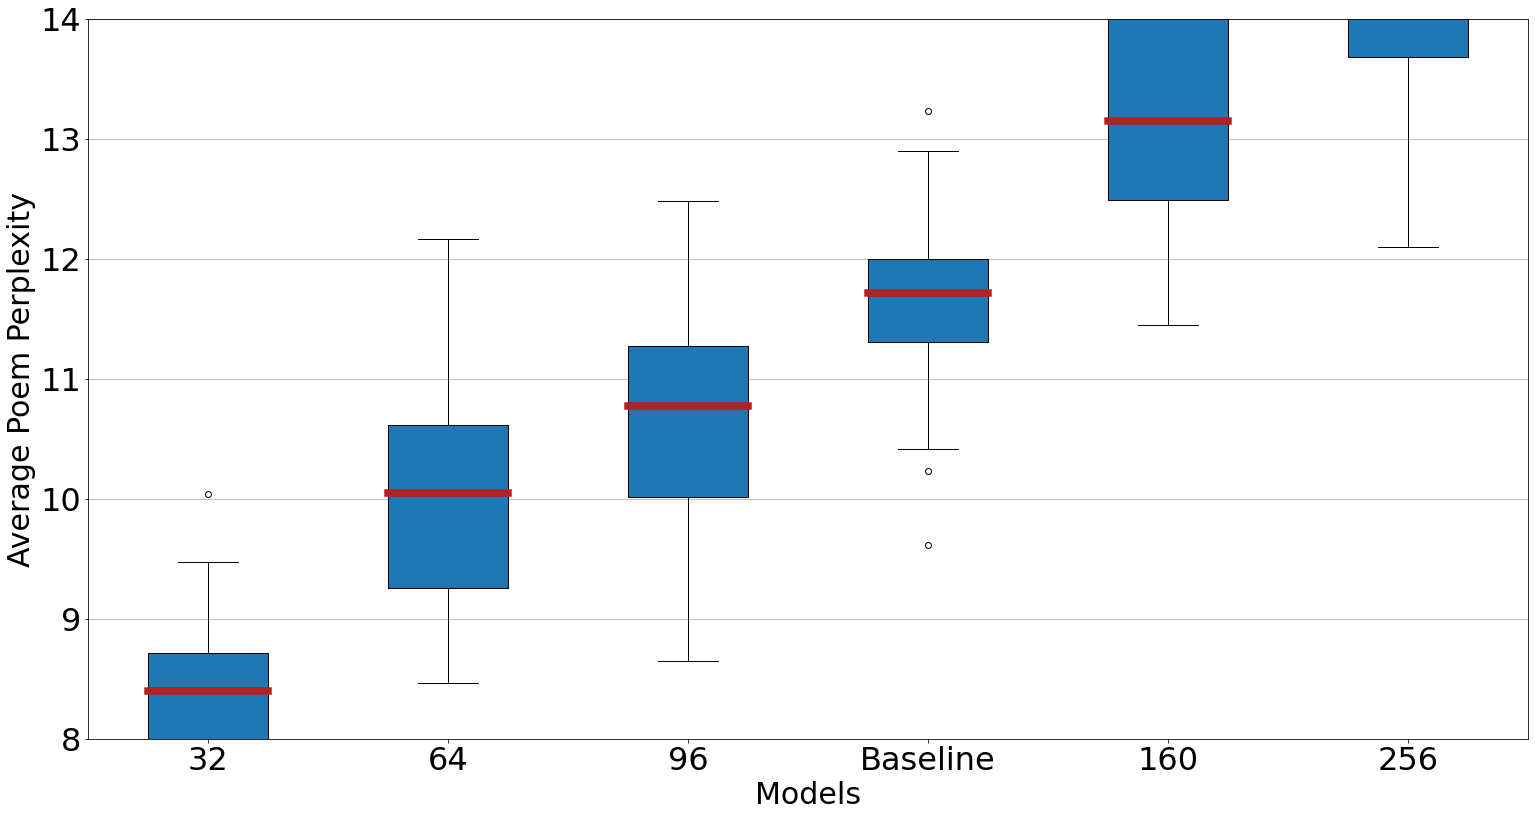

In [35]:
mpl.rcParams['font.size'] = 32
medianprops = dict(linestyle='-', linewidth=7.5, color='firebrick')
#threshold = 1
fig = plt.figure(figsize =(20, 10))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, patch_artist=True, medianprops=medianprops, labels=labels) 
#ax.axvline(threshold, c = "red", linestyle="--", alpha = 0.5)
ax.set_ylim(8,14)
plt.ylabel('Average Poem Perplexity', fontsize=30)
plt.xlabel('Models', fontsize=30)
plt.gca().yaxis.grid(True)
plt.savefig("boxplot.jpg", bbox_inches='tight')
plt.show()

In [36]:
import pandas as pd 

d = {
    
    '32': perplexity_3,
    '64': perplexity_2,
    '96': perplexity_4,
    'Baseline': perplexity_1, 
    '160': perplexity_5, 
    '256': perplexity_6
}

df = pd.DataFrame(data=d)
df.head()

,32,64,96,Baseline,160,256
0,8.904419,10.758376,9.792459,11.386522,14.172824,14.141502
1,8.282322,10.771498,11.120893,11.970005,11.446993,13.539290
2,8.509052,9.960000,11.159003,12.824393,12.288936,15.006974
3,8.381354,9.419412,10.833781,11.911040,13.638537,13.138162
4,8.566255,9.347592,10.781286,12.246606,13.274119,13.108444


In [37]:
model_names = df.columns #names of models

mean = df[model_names].mean()
pp_25per = df[model_names].quantile(q=.25)
pp_75per = df[model_names].quantile(q=.75)
maxPP = df[model_names].max()
minPP = df[model_names].min()
pp_5per = df[model_names].quantile(q=.05)
pp_95per = df[model_names].quantile(q=.95)

In [38]:
data_frames = [mean, pp_25per, pp_75per, maxPP, minPP, pp_5per, pp_95per]
column_names = ['meanPP', 'PP_25per', 'PP_75per', 'maxPP', 'minPP', 'PP_5per', 'PP_95per']
merged_df = pd.concat(data_frames, join='outer', axis=1)
merged_df.columns =column_names

In [39]:
merged_df

,meanPP,PP_25per,PP_75per,maxPP,minPP,PP_5per,PP_95per
32,8.363449,7.904480,8.716790,10.038264,7.228640,7.416936,9.411845
64,10.018249,9.258076,10.614957,12.168473,8.462615,8.744288,11.454544
96,10.690221,10.018318,11.274008,12.481449,8.644925,9.597243,11.837313
Baseline,11.630359,11.307856,12.002013,13.232445,9.611808,10.557629,12.719167
160,13.254266,12.489031,14.069191,15.410888,11.446993,11.766310,14.974341
256,15.106559,13.677711,16.349696,18.395486,12.101970,12.962249,18.001603


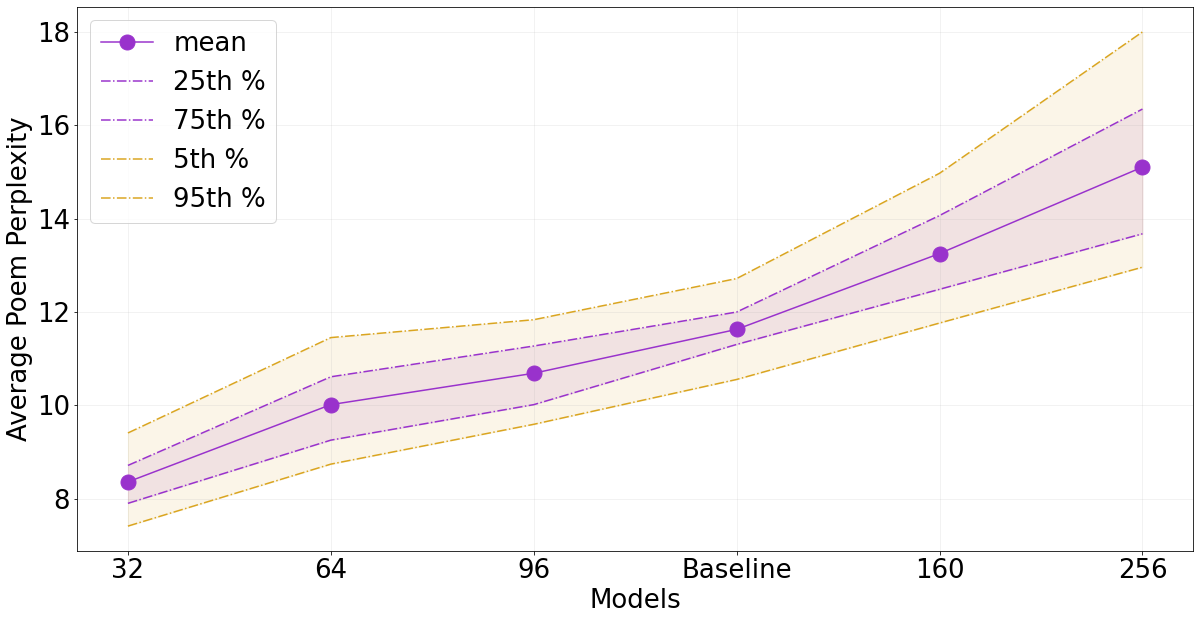

In [41]:
# source: https://towardsdatascience.com/the-matplotlib-line-plot-that-crushes-the-box-plot-912f8d2acd49


# Set the font size for all text on the plot
mpl.rcParams['font.size'] = 26

x = merged_df.index
y = merged_df.meanPP
y_low = merged_df.PP_25per
y_high = merged_df.PP_75per
y1_low = merged_df.PP_5per
y1_high = merged_df.PP_95per

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y, color='darkorchid', marker='o', label='mean', markersize=15)
ax.plot(x, y_low, color='darkorchid', linestyle='-.', label='25th %')
ax.plot(x, y_high, color='darkorchid', linestyle='-.', label='75th %')
ax.plot(x, y1_low, color='goldenrod', linestyle='-.', label='5th %')
ax.plot(x, y1_high, color='goldenrod', linestyle='-.', label='95th %')
ax.legend()

ax.fill_between(x, y_low, y_high, alpha = .1, color = 'darkorchid')
ax.fill_between(x, y1_low, y1_high, alpha = .1, color = 'goldenrod')

ax.grid(alpha = .2, which='both') 
ax.set_ylabel('Average Poem Perplexity', fontsize=26)
ax.set_xlabel('Models', fontsize=26)

plt.savefig("visual_graph_2.jpg", bbox_inches='tight')
plt.show()
